<a href="https://colab.research.google.com/github/Bagito999/Deep-Learning/blob/main/Autoencoders_and_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Persiapan

In [1]:
# Cek versi Python dan TensorFlow
import sys, os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl

assert sys.version_info >= (3, 5)
assert tf.__version__ >= "2.0"

# Deteksi lingkungan dan GPU
if not tf.config.list_physical_devices('GPU'):
    print("No GPU detected. Enable GPU for better performance.")
    if "google.colab" in sys.modules:
        print("Colab: Runtime > Change runtime type > GPU")
    elif "kaggle_secrets" in sys.modules:
        print("Kaggle: Settings > Accelerator > GPU")

# Seed untuk hasil konsisten
np.random.seed(42)
tf.random.set_seed(42)

# Konfigurasi tampilan matplotlib
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Path penyimpanan gambar
IMG_DIR = "./images/autoencoders"
os.makedirs(IMG_DIR, exist_ok=True)

# Fungsi bantu
def save_fig(name, tight_layout=True):
    path = os.path.join(IMG_DIR, f"{name}.png")
    print("Saving figure", name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=300)

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")


#PCA with a linear Autoencoder

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Saving figure linear_autoencoder_pca_plot


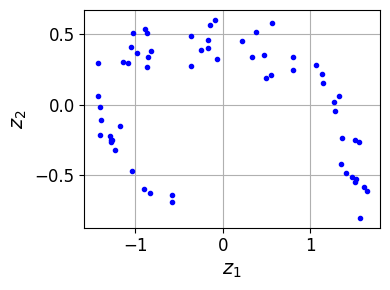

In [2]:
# Data 3D sintetis
np.random.seed(4)
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    x = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    y = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    z = x * w1 + y * w2 + noise * np.random.randn(m)
    return np.c_[x, y, z]

X_train = generate_3d_data(60)
X_train -= X_train.mean(axis=0)

# Model Autoencoder Linear
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(1.5))

# Training
history = autoencoder.fit(X_train, X_train, epochs=20, verbose=0)

# Proyeksi hasil encoding
codings = encoder.predict(X_train)

# Visualisasi proyeksi 2D
plt.figure(figsize=(4,3))
plt.plot(codings[:, 0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=14)
plt.ylabel("$z_2$", fontsize=14)
plt.grid(True)
save_fig("linear_autoencoder_pca_plot")
plt.show()


#Stacked Autoencoders

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - lambda: 0.8552 - loss: 0.3744 - val_lambda: 0.9021 - val_loss: 0.3148
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - lambda: 0.9151 - loss: 0.3056 - val_lambda: 0.9191 - val_loss: 0.3021
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - lambda: 0.9222 - loss: 0.2976 - val_lambda: 0.9260 - val_loss: 0.2961
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - lambda: 0.9265 - loss: 0.2929 - val_lambda: 0.9301 - val_loss: 0.2926
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - lambda: 0.9291 - loss: 0.2900 - val_lambda: 0.9321 - val_loss: 0.2901
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - lambda: 0.9310 - loss: 0.2880 - val_lambda: 0.9324 - val_loss: 0.2886
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - lambda: 0.9324 - loss: 0.2864 - val_lambda: 0.9332 - val_loss: 0.2874
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - lambda: 0.9334 - loss: 0.2852 - val_lambda: 0.9333 - val_loss

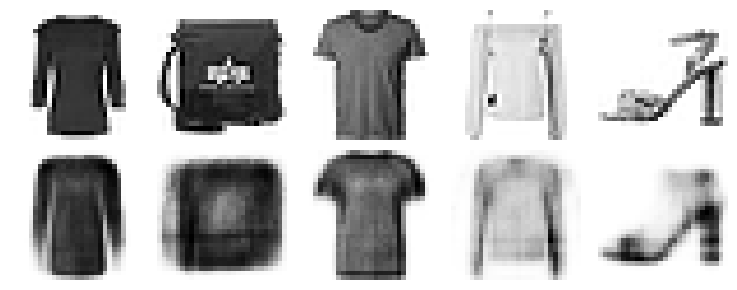

In [3]:
# Load dan normalisasi data
(X_train_full, _), (X_test, _) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]

# Autoencoder bertingkat (stacked)
tf.random.set_seed(42)
np.random.seed(42)

encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28, 28]),
])

autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",
                    optimizer=keras.optimizers.SGD(1.5),
                    metrics=[lambda y_true, y_pred: keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))])

# Training model
history = autoencoder.fit(X_train, X_train, epochs=20, validation_data=(X_valid, X_valid))

# Visualisasi hasil rekonstruksi
def show_reconstructions(model, images=X_valid, n=5):
    recon = model.predict(images[:n])
    plt.figure(figsize=(n * 1.5, 3))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plot_image(images[i])
        plt.subplot(2, n, i + 1 + n)
        plot_image(recon[i])

show_reconstructions(autoencoder)
save_fig("reconstruction_plot")


#Visualizing Fashion MNIST

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


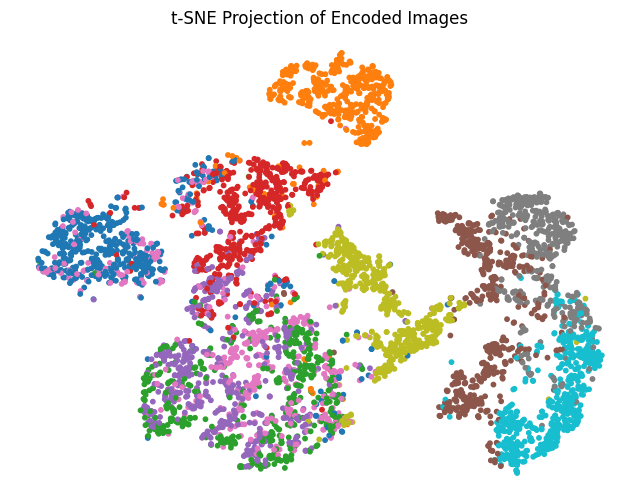

Saving figure fashion_mnist_tsne


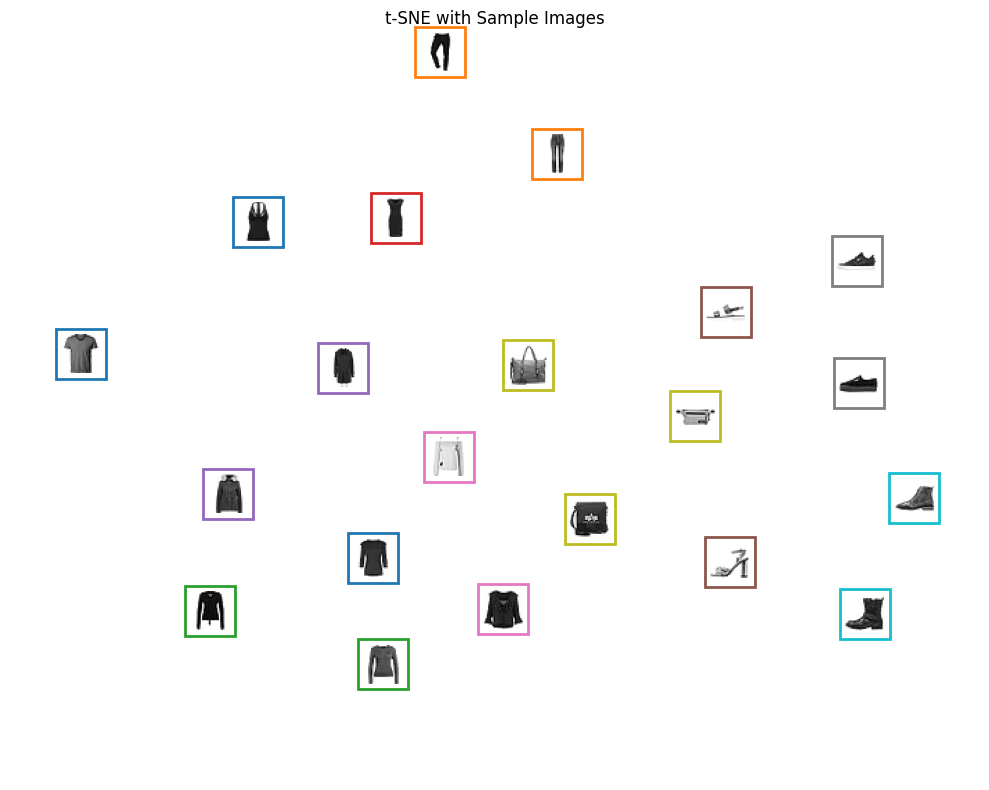

In [5]:
from sklearn.manifold import TSNE
from matplotlib import offsetbox

# Load ulang dengan label
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# Kompresi ke 30D lalu ke 2D dengan t-SNE
X_valid_compressed = encoder.predict(X_valid)
tsne = TSNE()
X_2D = tsne.fit_transform(X_valid_compressed)
X_2D = (X_2D - X_2D.min()) / (X_2D.max() - X_2D.min())

# Visualisasi warna berdasarkan label
plt.figure(figsize=(8, 6))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.title("t-SNE Projection of Encoded Images")
plt.show()

# Visualisasi contoh gambar
plt.figure(figsize=(10, 8))
shown_images = np.array([[1., 1.]])
for i in range(len(X_valid)):
    dist = np.sum((X_2D[i] - shown_images) ** 2, axis=1)
    if np.min(dist) > 0.02:
        shown_images = np.vstack([shown_images, X_2D[i]])
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(X_valid[i], cmap="binary"),
            X_2D[i],
            bboxprops=dict(edgecolor=plt.cm.tab10(y_valid[i]), lw=2)
        )
        plt.gca().add_artist(imagebox)

plt.axis("off")
plt.title("t-SNE with Sample Images")
save_fig("fashion_mnist_tsne")
plt.show()


#Tying weights

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - lambda: 0.8562 - loss: 0.3727 - val_lambda: 0.9098 - val_loss: 0.3072
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - lambda: 0.9197 - loss: 0.2998 - val_lambda: 0.9214 - val_loss: 0.2967
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - lambda: 0.9267 - loss: 0.2925 - val_lambda: 0.9254 - val_loss: 0.2925
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - lambda: 0.9299 - loss: 0.2890 - val_lambda: 0.9261 - val_loss: 0.2909
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - lambda: 0.9319 - loss: 0.2867 - val_lambda: 0.9292 - val_loss: 0.2883
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - lambda: 0.9334 - loss: 0.2851 - val_lambda: 0.9318 - val_loss: 0.2865
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - lambda: 0.9345 - loss: 0.2838 - val_lambda: 0.9326 - val_loss: 0.2855
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - lambda: 0.9354 - loss: 0.2829 - val_lambda: 0.9334 - val_loss:

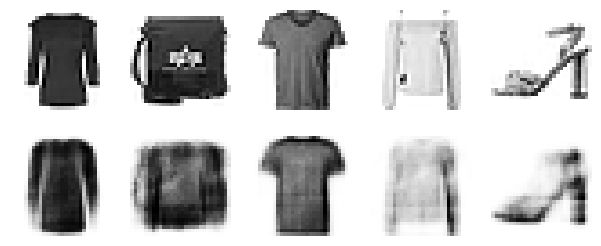

In [7]:
# Layer DenseTranspose (tied weights)
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.dense = dense
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        input_dim = self.dense.kernel.shape[0]  # dimensi input asli dari dense
        self.biases = self.add_weight(name="bias",
                                      shape=[input_dim],
                                      initializer="zeros")
        super().build(batch_input_shape)

    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.kernel, transpose_b=True)
        return self.activation(z + self.biases)

# Inisialisasi ulang
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# Encoder & decoder (tied)
d1 = keras.layers.Dense(100, activation="selu")
d2 = keras.layers.Dense(30, activation="selu")

encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    d1,
    d2
])

decoder = keras.models.Sequential([
    DenseTranspose(d2, activation="selu"),
    DenseTranspose(d1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

# Autoencoder gabungan
tied_autoencoder = keras.models.Sequential([encoder, decoder])
tied_autoencoder.compile(loss="binary_crossentropy",
                         optimizer=keras.optimizers.SGD(1.5),
                         metrics=[lambda y_true, y_pred: keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))])

# Latih model
tied_autoencoder.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

# Tampilkan hasil rekonstruksi
show_reconstructions(tied_autoencoder)
plt.show()

#Training one Autoencoder at a Time

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


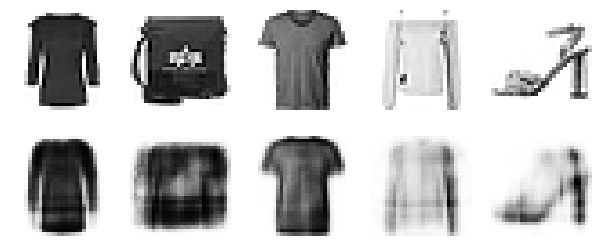

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


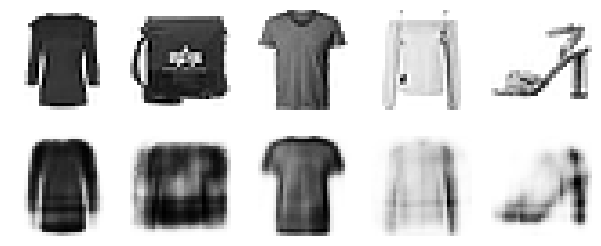

In [9]:
# Fungsi metrik akurasi pembulatan
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

# Fungsi pelatihan autoencoder 1 layer
def train_autoencoder(n_neurons, X_train, X_valid, loss, optimizer,
                      n_epochs=10, output_activation=None, metrics=None):
    n_inputs = X_train.shape[-1]
    encoder = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", input_shape=[n_inputs])
    ])
    decoder = keras.models.Sequential([
        keras.layers.Dense(n_inputs, activation=output_activation)
    ])
    autoencoder = keras.models.Sequential([encoder, decoder])
    autoencoder.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid), verbose=0)
    return encoder, decoder, encoder(X_train), encoder(X_valid)

# Inisialisasi ulang & flatten data
tf.random.set_seed(42)
np.random.seed(42)
X_train_flat = X_train.reshape(-1, 28*28)
X_valid_flat = X_valid.reshape(-1, 28*28)

# Training layer pertama
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat, loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(1.5),
    output_activation="sigmoid", metrics=[rounded_accuracy])

# Training layer kedua (di atas encoded dari layer 1)
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, loss="mse",
    optimizer=keras.optimizers.SGD(0.05),
    output_activation="selu")

# Gabungkan semua encoder dan decoder menjadi stacked autoencoder
stacked_ae = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])

# Visualisasi sebelum fine-tuning
show_reconstructions(stacked_ae)
plt.show()

# Fine-tuning keseluruhan stacked autoencoder
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(0.1),
                   metrics=[rounded_accuracy])
stacked_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid), verbose=0)

# Visualisasi hasil setelah fine-tuning
show_reconstructions(stacked_ae)
plt.show()

#Using Convolutional Layers Instead of Dense Layers

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - lambda: 0.8895 - loss: 0.3375 - val_lambda: 0.9381 - val_loss: 0.2804
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - lambda: 0.9402 - loss: 0.2763 - val_lambda: 0.9443 - val_loss: 0.2736
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - lambda: 0.9459 - loss: 0.2707 - val_lambda: 0.9482 - val_loss: 0.2701
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - lambda: 0.9491 - loss: 0.2677 - val_lambda: 0.9496 - val_loss: 0.2687
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - lambda: 0.9511 - loss: 0.2658 - val_lambda: 0.9519 - val_loss: 0.2666


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,296 (91.00 KB)

 Trainable params: 23,296 (91.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose                │ (None, 7, 7, 32)       │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 16)     │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           145 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,233 (90.75 KB)

 Trainable params: 23,233 (90.75 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


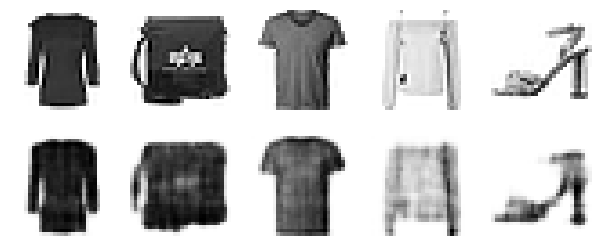

In [10]:
# Seed dan reset
tf.random.set_seed(42)
np.random.seed(42)

# Encoder konvolusional
conv_encoder = keras.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, 3, padding="same", activation="selu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32, 3, padding="same", activation="selu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, padding="same", activation="selu"),
    keras.layers.MaxPooling2D(2)
])

# Decoder konvolusional (transpose)
conv_decoder = keras.Sequential([
    keras.layers.Conv2DTranspose(32, 3, strides=2, padding="valid", activation="selu", input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, 3, strides=2, padding="same", activation="selu"),
    keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

# Model autoencoder konvolusional
conv_ae = keras.Sequential([conv_encoder, conv_decoder])
conv_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(1.0),
                metrics=[lambda y_true, y_pred: keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))])

# Training
conv_ae.fit(X_train, X_train, epochs=5, validation_data=(X_valid, X_valid), verbose=1)

# Ringkasan model
conv_encoder.summary()
conv_decoder.summary()

# Visualisasi hasil rekonstruksi
show_reconstructions(conv_ae)
plt.show()

#Recurrent Autoencoders

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - lambda: 0.7131 - loss: 0.5643 - val_lambda: 0.7950 - val_loss: 0.4639
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - lambda: 0.8217 - loss: 0.4379 - val_lambda: 0.8598 - val_loss: 0.3832
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - lambda: 0.8611 - loss: 0.3761 - val_lambda: 0.8764 - val_loss: 0.3613
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - lambda: 0.8755 - loss: 0.3585 - val_lambda: 0.8826 - val_loss: 0.3530
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - lambda: 0.8829 - loss: 0.3473 - val_lambda: 0.8845 - val_loss: 0.3481
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - lambda: 0.8891 - loss: 0.3385 - val_lambda: 0.8933 - val_loss: 0.3353
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - lambda: 0.8935 - loss: 0.3314 - val_lambda: 0.8966 - val_loss: 0.3285
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - lambda: 0.8968 - loss: 0.3263 - val_lambda: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


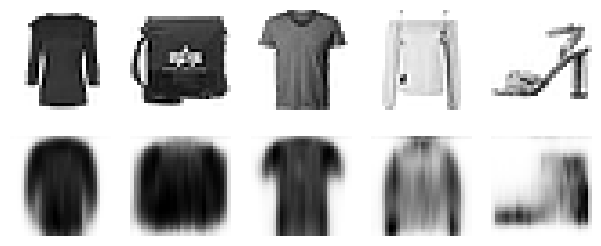

In [11]:
# Encoder dan decoder berbasis LSTM
recurrent_encoder = keras.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(30)
])

recurrent_decoder = keras.Sequential([
    keras.layers.RepeatVector(28),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])

# Autoencoder lengkap
recurrent_ae = keras.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(0.1),
                     metrics=[lambda y_true, y_pred: keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))])

# Training
recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid), verbose=1)

# Visualisasi hasil rekonstruksi
show_reconstructions(recurrent_ae)
plt.show()


#Stacked denoising Autoencoder

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


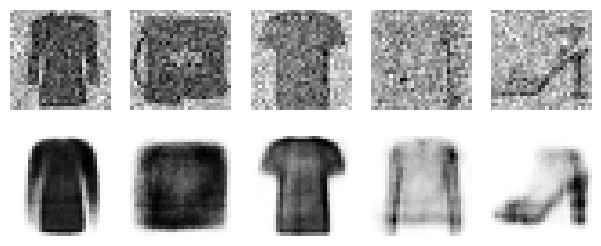

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Saving figure dropout_denoising_plot


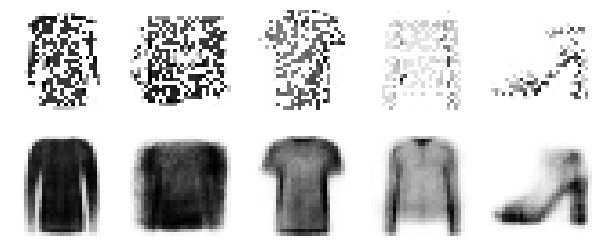

In [12]:
# === Denoising Autoencoder (Gaussian Noise) ===
tf.random.set_seed(42)
np.random.seed(42)

gauss_encoder = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])

gauss_decoder = keras.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

gauss_ae = keras.Sequential([gauss_encoder, gauss_decoder])
gauss_ae.compile(loss="binary_crossentropy",
                 optimizer=keras.optimizers.SGD(1.0),
                 metrics=[lambda y_true, y_pred: keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))])
gauss_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid), verbose=0)

# Visualisasi Gaussian Denoising
noise_layer = keras.layers.GaussianNoise(0.2)
show_reconstructions(gauss_ae, noise_layer(X_valid, training=True))
plt.show()

# === Denoising Autoencoder (Dropout) ===
tf.random.set_seed(42)
np.random.seed(42)

drop_encoder = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])

drop_decoder = keras.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

drop_ae = keras.Sequential([drop_encoder, drop_decoder])
drop_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(1.0),
                metrics=[lambda y_true, y_pred: keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))])
drop_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid), verbose=0)

# Visualisasi Dropout Denoising
dropout_layer = keras.layers.Dropout(0.5)
show_reconstructions(drop_ae, dropout_layer(X_valid, training=True))
save_fig("dropout_denoising_plot", tight_layout=False)
plt.show()


#Generative Adversarial Networks

In [13]:
# === Setup dan Model GAN ===
tf.random.set_seed(42)
np.random.seed(42)
codings_size = 30
batch_size = 32

# Generator: codings_size → gambar 28x28
generator = keras.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

# Discriminator: gambar → prediksi real/fake
discriminator = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Kompilasi model
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan = keras.Sequential([generator, discriminator])
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

# Dataset batched
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000).batch(batch_size, drop_remainder=True).prefetch(1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=10):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f"Epoch {epoch+1}/{n_epochs}")
        for X_batch in dataset:
            # === Latih discriminator ===
            noise = tf.random.normal([batch_size, codings_size])
            gen_images = generator(noise)
            X_mix = tf.concat([gen_images, X_batch], axis=0)
            y_mix = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_mix, y_mix)

            # === Latih generator ===
            noise = tf.random.normal([batch_size, codings_size])
            y_gen = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)

        # Visualisasi hasil setiap epoch
        plot_multiple_images(gen_images, 8)
        plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


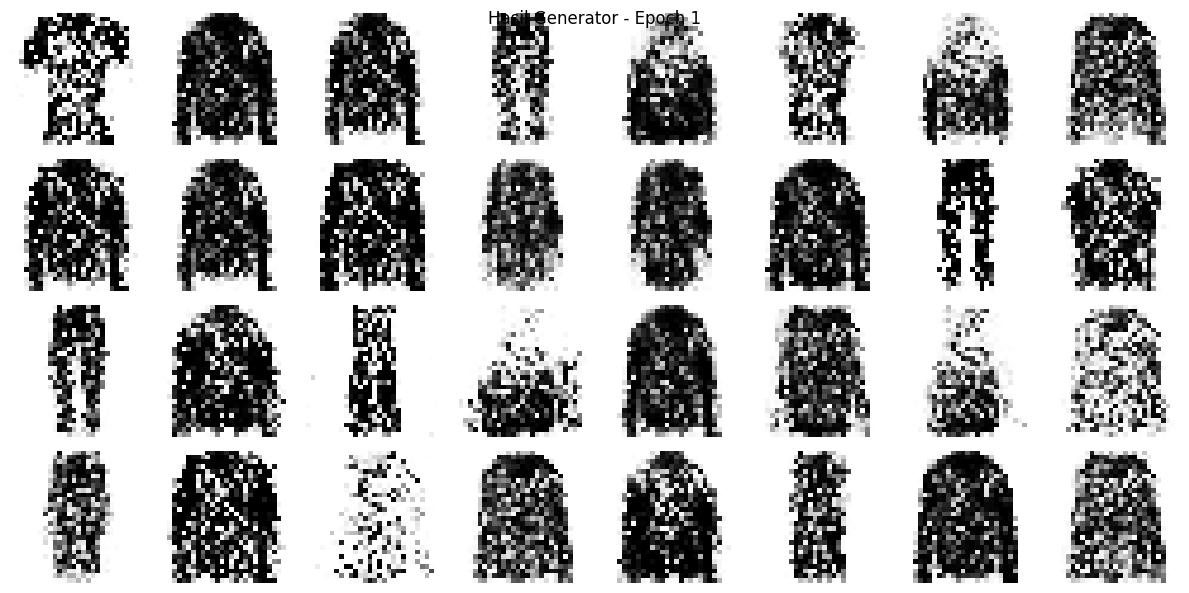

Epoch 2/5


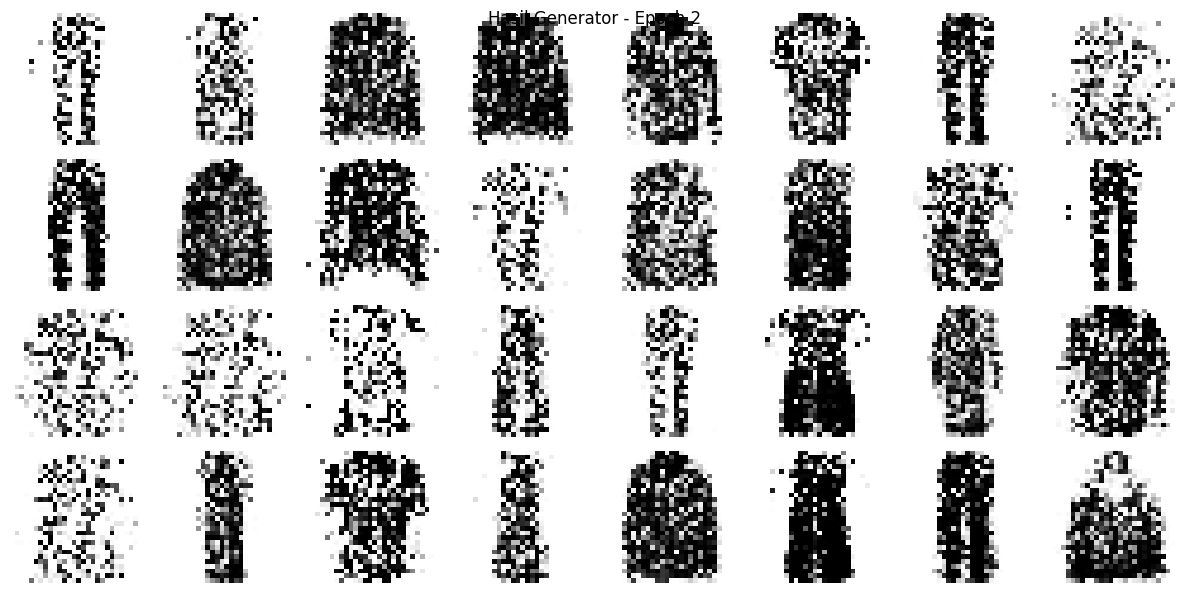

Epoch 3/5


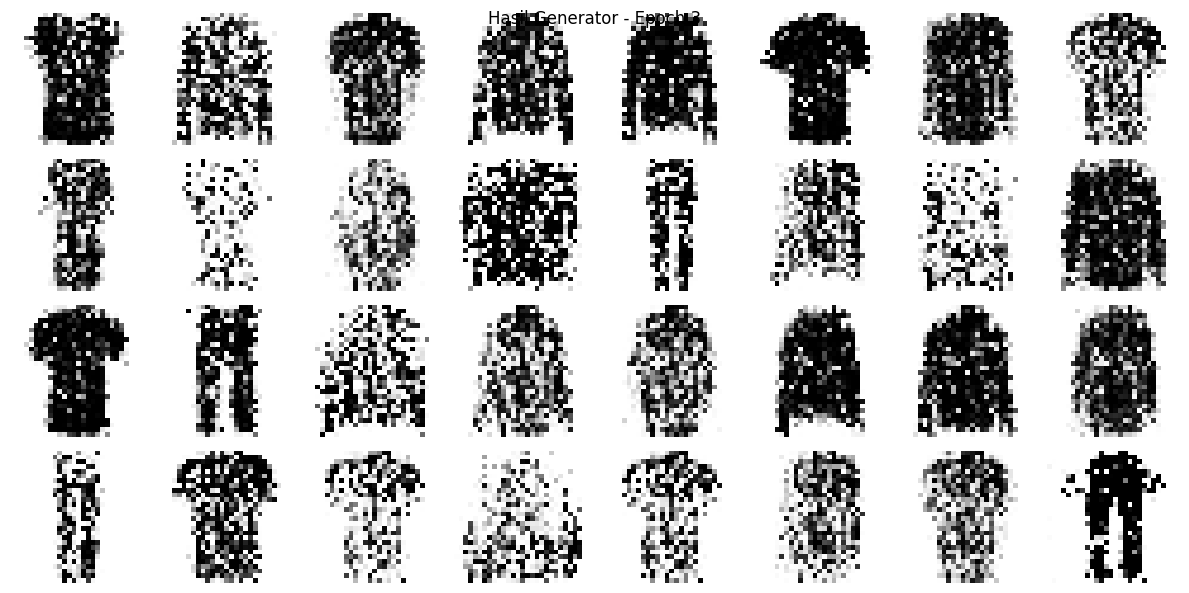

Epoch 4/5


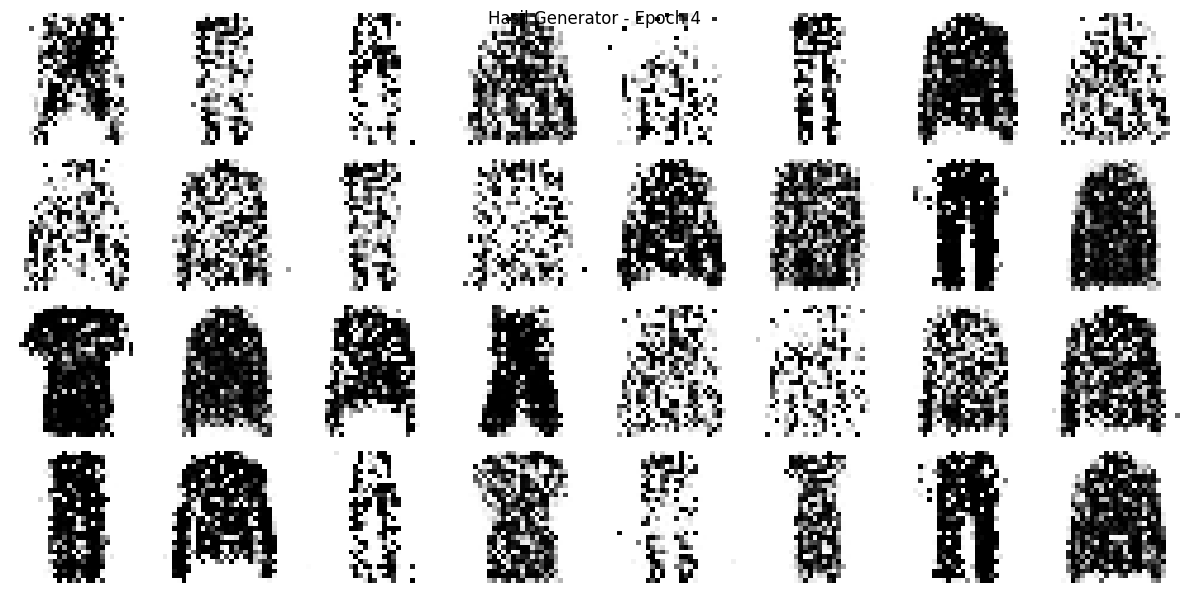

Epoch 5/5


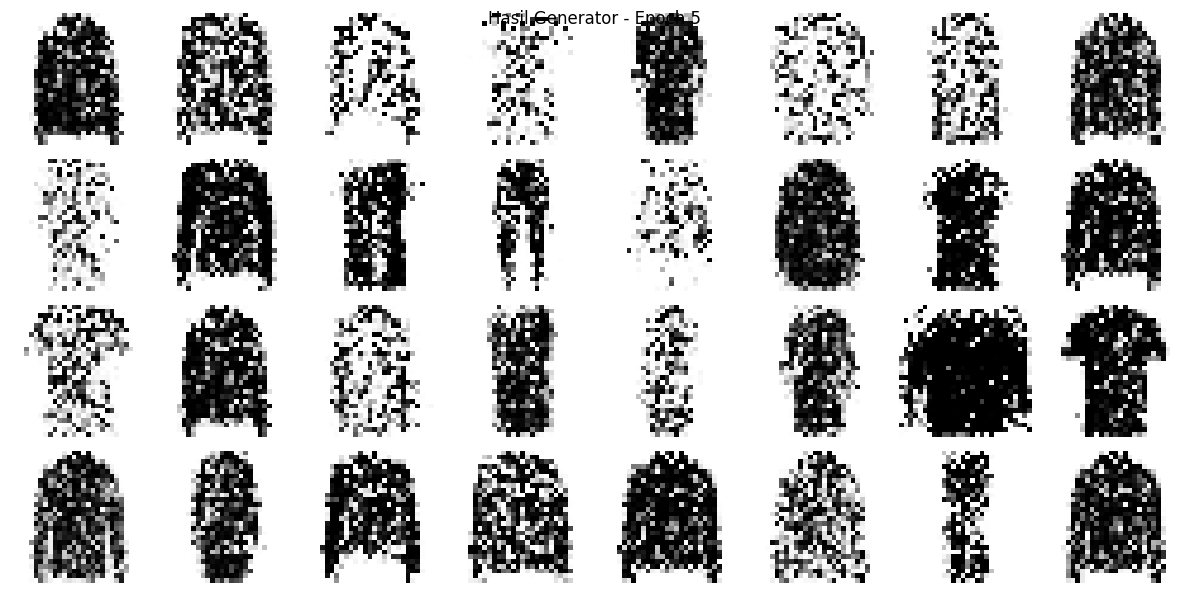

In [19]:
# --- Setup awal ---
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

# Setup seed
tf.random.set_seed(42)
np.random.seed(42)

# --- Load dataset (MNIST / Fashion MNIST) ---
(X_train_full, _), (_, _) = keras.datasets.fashion_mnist.load_data()
X_train = X_train_full.astype("float32") / 255.0  # Normalisasi
X_train = X_train.reshape(-1, 28, 28)  # Tetap 3D, channel ditambahkan nanti

# --- Parameter GAN ---
codings_size = 30
batch_size = 32

# --- Generator: Noise → Gambar 28x28x1 ---
generator = keras.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28, 1])
])

# --- Discriminator: Gambar → Real/Fake ---
discriminator = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")

# --- GAN Model ---
discriminator.trainable = False
gan = keras.Sequential([generator, discriminator])
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

# --- Dataset dengan batching ---
dataset = tf.data.Dataset.from_tensor_slices(X_train)\
          .shuffle(1000)\
          .batch(batch_size, drop_remainder=True)\
          .prefetch(1)

# --- Fungsi Visualisasi Gambar Generator ---
def plot_multiple_images(images, n_cols=5):
    images = images.numpy()
    n_rows = (len(images) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
    for i, image in enumerate(images[:n_rows * n_cols]):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(image.squeeze(), cmap="binary")
        plt.axis("off")
    plt.tight_layout()

# --- Fungsi Pelatihan GAN ---
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=10):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f"Epoch {epoch + 1}/{n_epochs}")
        for X_batch in dataset:
            X_batch = tf.expand_dims(X_batch, axis=-1)  # Ubah jadi [batch, 28, 28, 1]

            # === Latih Discriminator ===
            noise = tf.random.normal([batch_size, codings_size])
            gen_images = generator(noise)
            X_mix = tf.concat([gen_images, X_batch], axis=0)
            y_mix = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_mix, y_mix)

            # === Latih Generator ===
            noise = tf.random.normal([batch_size, codings_size])
            y_gen = tf.constant([[1.]] * batch_size)  # Generator ingin menipu
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)

        # Visualisasi hasil akhir tiap epoch
        gen_images = generator(tf.random.normal([batch_size, codings_size]))
        plot_multiple_images(gen_images, n_cols=8)
        plt.suptitle(f"Hasil Generator - Epoch {epoch+1}")
        plt.show()

# --- Jalankan Pelatihan GAN ---
train_gan(gan, dataset, batch_size, codings_size, n_epochs=5)


#Deep Convolutional GAN

In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)

codings_size = 100
batch_size = 32

# Generator
generator = keras.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, 5, strides=2, padding="same", activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, 5, strides=2, padding="same", activation="tanh")
])

# Discriminator
discriminator = keras.Sequential([
    keras.layers.Conv2D(64, 5, strides=2, padding="same",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, 5, strides=2, padding="same",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")

# Gabungan GAN
discriminator.trainable = False
gan = keras.Sequential([generator, discriminator])
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Normalisasi dan batching
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1.
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan).shuffle(1000).batch(batch_size, drop_remainder=True).prefetch(1)

In [23]:
def plot_generated_images(generator, n_images=16):
    noise = tf.random.normal([n_images, codings_size])
    images = generator(noise, training=False)
    images = (images + 1) / 2  # rescale to [0,1]

    plt.figure(figsize=(6, 6))
    for i in range(n_images):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i, :, :, 0], cmap="gray")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

def train_gan(gan, dataset, batch_size, codings_size, n_epochs=1):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f"Epoch {epoch+1}/{n_epochs}")
        for X_batch in dataset:
            # Train discriminator
            noise = tf.random.normal([batch_size, codings_size])
            gen_images = generator(noise)
            X_mix = tf.concat([gen_images, X_batch], axis=0)
            y_mix = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_mix, y_mix)

            # Train generator
            noise = tf.random.normal([batch_size, codings_size])
            y_mislabeled = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_mislabeled)

        # Tampilkan hasil tiap epoch
        plot_generated_images(generator)


Epoch 1/1


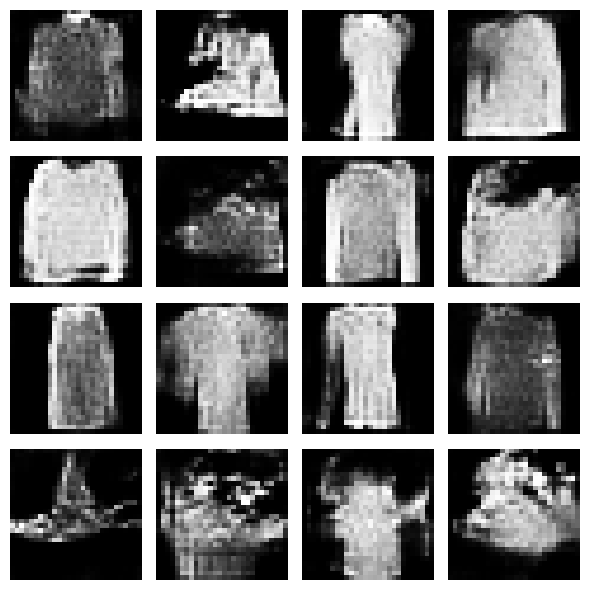

In [24]:
# Latih 1 epoch dan tampilkan hasil
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)

#  Ringkasan Proses Autoencoders dan GANs

## 🔹 Autoencoders (AE)
Autoencoders digunakan untuk memampatkan dan merekonstruksi data. Proses pelatihan dilakukan dengan tujuan meminimalkan selisih antara input dan output.

###  Jenis-Jenis Autoencoders:
- **Basic (Stacked) Autoencoder**  
  - Encoder dan decoder terdiri dari layer Dense biasa.
  - Data dilatihkan untuk direkonstruksi dari representasi laten berdimensi lebih rendah.
  
- **Tied Weights Autoencoder**  
  - Decoder menggunakan bobot transpose dari encoder (berbagi bobot).
  - Mengurangi jumlah parameter dan menjaga simetri.

- **Layer-wise (1-by-1) Pretraining**  
  - Melatih autoencoder satu layer demi satu layer secara bertahap.
  - Memungkinkan pelatihan stabil pada arsitektur dalam (deep).

- **Convolutional Autoencoder (ConvAE)**  
  - Memanfaatkan layer Conv2D dan Conv2DTranspose.
  - Lebih baik untuk menangkap pola spasial pada citra (misal MNIST/Fashion MNIST).

- **Recurrent Autoencoder (LSTM AE)**  
  - Gunakan LSTM untuk menyandikan urutan baris piksel.
  - Cocok untuk data sekuensial atau citra yang diproses sebagai urutan.

- **Denoising Autoencoder**  
  - Input diberi gangguan (noise/Dropout) lalu direkonstruksi kembali ke bentuk aslinya.
  - Meningkatkan robustnes model terhadap gangguan input.

---

## 🔹 Generative Adversarial Networks (GANs)
GAN melibatkan dua jaringan:
- **Generator**: Menghasilkan data sintetis dari noise.
- **Discriminator**: Membedakan data asli atau palsu.

###  Jenis-Jenis GAN:
- **Simple GAN (Dense)**  
  - Generator dan Discriminator berbasis Dense layer.
  - Menghasilkan gambar dari vektor acak (codings).

- **DCGAN (Deep Convolutional GAN)**  
  - Gunakan Conv2DTranspose untuk Generator dan Conv2D untuk Discriminator.
  - Memanfaatkan arsitektur CNN untuk hasil yang lebih realistis.

---

##  Kesimpulan

- Autoencoders efektif untuk kompresi, rekonstruksi, dan deteksi noise.
- GANs lebih cocok untuk **generasi data baru** secara realistis, seperti gambar sintetis.
- Kombinasi teknik (seperti Denoising, Tied Weights, Layer-wise Training) pada AE meningkatkan performa dan kestabilan pelatihan.
- DCGAN menghasilkan gambar yang **lebih realistis dan tajam** dibanding GAN biasa.
- Semua model membutuhkan normalisasi input yang sesuai (`[0, 1]` untuk AE, `[-1, 1]` untuk GAN).
- Visualisasi hasil menunjukkan bahwa semakin kompleks arsitektur (Conv, LSTM), semakin baik hasil rekonstruksi/generasi gambar, meski waktu pelatihan juga meningkat.

---
